In [244]:
import pandas as pd

def load_data(path):
    diabetes = pd.read_csv(path,header=0)
    return diabetes

def load_diabetes_data():
    PATH = "datasets/Diabetes/pima-indians-diabetes.csv"
    diabetes_df = load_data(PATH)
    return diabetes_df

In [245]:
load_diabetes_data().head()

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### visualisation of data

In [246]:
data = load_diabetes_data()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
NOP                768 non-null int64
Plasma             768 non-null int64
BP                 768 non-null int64
TSKIN_THICKNESS    768 non-null int64
SERUM_INSULIN      768 non-null int64
BMI                768 non-null float64
PEDIGREE           768 non-null float64
AGE                768 non-null int64
Target             768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###  no null value in any column

In [247]:
data.describe()

,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Plasma, BP,tskin_thickness,BMI and serum_insulin have 0 min values which seems incorrect in any living human.

###  Lets count instaces of above parameters which have 0 minimum value.

In [248]:
def count_zero_invalid_instances_attribute(data,attributes):
    attribute_rows = []
    attribute_names = []
    for attribute in attributes:
        rows = data[data[attribute]==0].shape[0]
        attribute_rows.append(rows) 
        attribute_names.append(attribute)
    attr_count_df = pd.DataFrame({"Attribute" : attribute_names,"Count": attribute_rows})
    return attr_count_df
    
    


In [249]:
attributes = ["Plasma","BP","TSKIN_THICKNESS","BMI","SERUM_INSULIN"]
count_zero_invalid_instances_attribute(data,attributes)

,Attribute,Count
0,Plasma,5
1,BP,35
2,TSKIN_THICKNESS,227
3,BMI,11
4,SERUM_INSULIN,374


### As tskin and Insulin instances which have 0 value are in large number; 227 and 374 out 768, removing them will reduce data very much. However, BP, Plasma and BMI data which have 0 value can be removed from data.

### Lets visualise data 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000020F81FD0>,
      dtype=object)

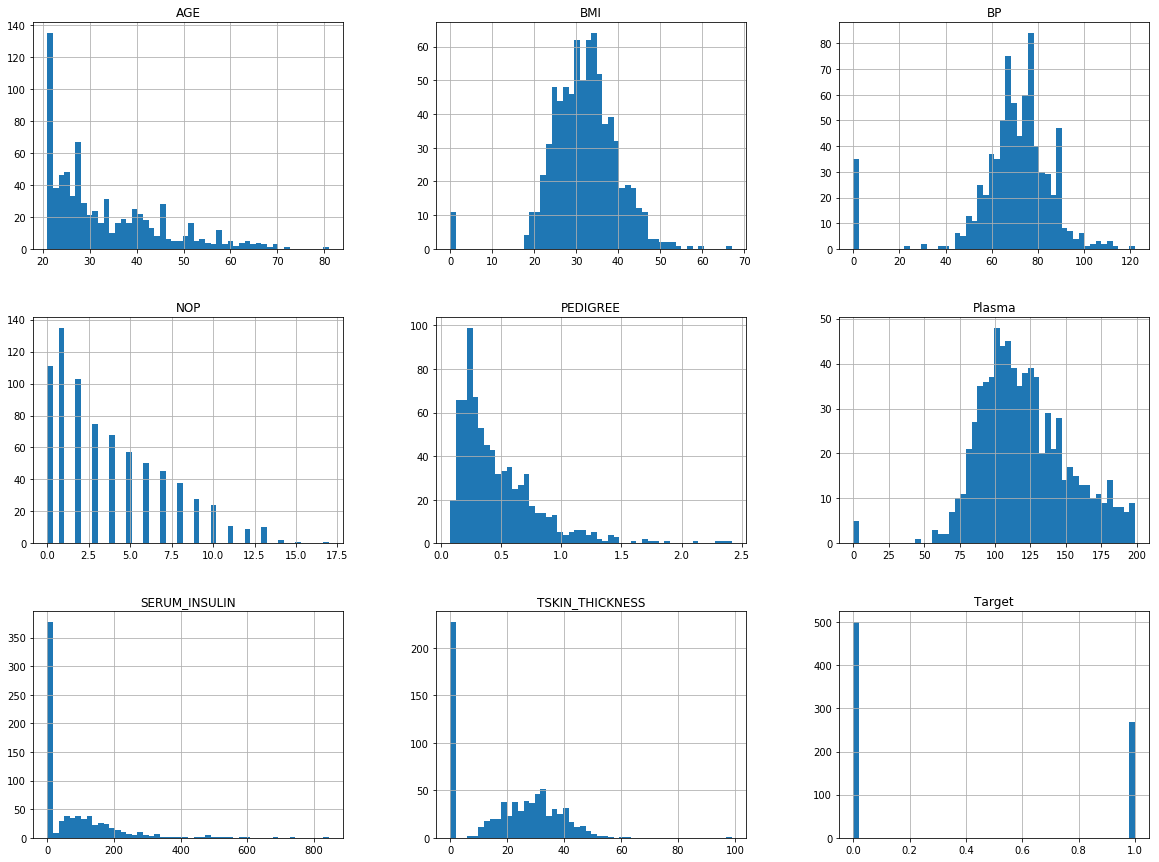

In [250]:
from matplotlib import pyplot as plt
data.hist(bins=50,figsize=(20,15))

### Data seems fine in above graphs except they have 0 value outliers. For example, Plasma, BP and BMI have bar of 0 value far away from centered data

### Lets plot corelation matrix

In [251]:
corelation_matrix = data.corr()
corelation_matrix["Target"].sort_values(ascending=False)

Target             1.000000
Plasma             0.466581
BMI                0.292695
AGE                0.238356
NOP                0.221898
PEDIGREE           0.173844
SERUM_INSULIN      0.130548
TSKIN_THICKNESS    0.074752
BP                 0.065068
Name: Target, dtype: float64

### Seems like plasma and BMI are very much related to target(Diabetes). Lets plot them

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000020F67DA0>,
      dtype=object)

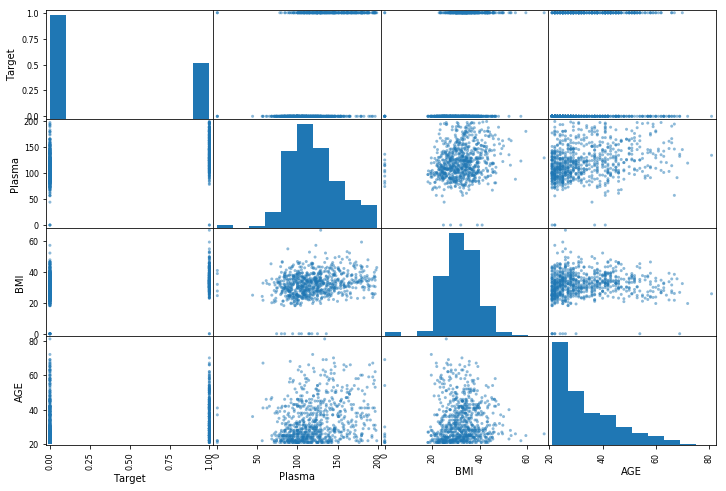

In [252]:
from pandas.plotting import scatter_matrix
attributes = ["Target","Plasma","BMI","AGE"]
scatter_matrix(diabetes[attributes],figsize=(12,8))

### Lets plot target,Plasma relationship

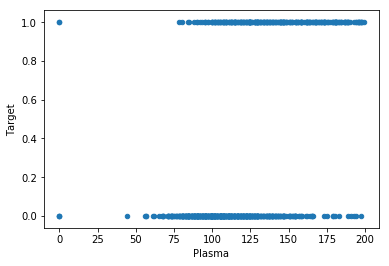

In [253]:
diabetes.plot(kind="scatter",x = "Plasma", y ="Target")

### Seems like Diabetes exists when plasma is higher than about 70

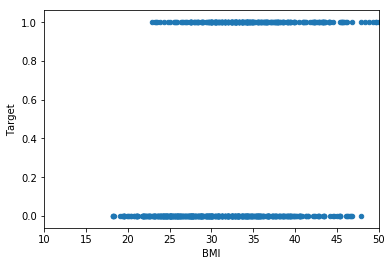

In [254]:
diabetes.plot(kind="scatter",x = "BMI", y ="Target",xlim=(10,50))

### Clearly BMI less than 22 dont have diabetes

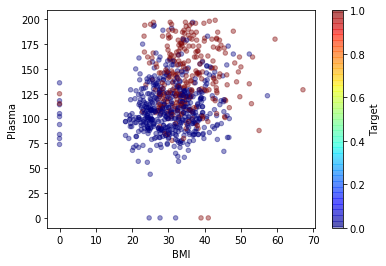

In [255]:
diabetes.plot(kind="scatter",x="BMI",y="Plasma",alpha=0.4, c="Target", cmap=plt.get_cmap("jet"),colorbar=True,)

### Here orange color is in center and towards upward. so diabetes is present where Plasma is mostly higher than 100 and BMI is greater than about 22. Plasma seems to have more to do with diabetes here.

### Lets start. First clean the data by removing invalid zero values

In [256]:
from sklearn.base import BaseEstimator, TransformerMixin
class RemoveInvalidZeroValuesAttributes(BaseEstimator, TransformerMixin):
    def __init__(self,attributes):
        self.attributes = attributes
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        attrs = self.attributes
        for attribute in attrs:
            X= X[X[attribute]>0]
        return X
        
    

### Pass the list of attributes whose zero values you want to remove

In [257]:
attributes = ["BP","BMI","Plasma"]
cleaner = RemoveInvalidZeroValuesAttributes(attributes)
data_cleaned = cleaner.transform(data)

In [258]:
data_cleaned.describe()


,NOP,Plasma,BP,TSKIN_THICKNESS,SERUM_INSULIN,BMI,PEDIGREE,AGE,Target
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Notice above three attributes dont have minimum value 0 now as all the rows for 0 are removed for those attributes

In [259]:
data = load_diabetes_data()


In [260]:
def Separate_X_y_data(data):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    data = data.iloc[shuffled_indices]
    y = data["Target"]
    X = data.drop(columns='Target')
    return X,y

In [261]:
import numpy as np
# This returns X_train, X_test, y_train, y_test
def produce_train_test_data(X,y,test_ratio):
    test_set_size = int(len(data)*test_ratio)
    return X[test_set_size:], X[:test_set_size],y[test_set_size:],y[:test_set_size]

### Later i will try with standard scaling on data also

In [262]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
def preprocess_data(data,ratio,attributesToClean):
    data_preprocess_pipeline = Pipeline([("purge_zero",RemoveInvalidZeroValuesAttributes(attributesToClean)),])
    data = data_preprocess_pipeline.fit_transform(data)
    data = pd.DataFrame.from_records(data)
    X, y = Separate_X_y_data(data)
    X_train, X_test, y_train, y_test = produce_train_test_data(X,y,ratio)
    return X_train, X_test, y_train, y_test

In [263]:
X_train, X_test, y_train, y_test = preprocess_data(data,0.1,["BP","BMI","Plasma"])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((648, 8), (76, 8), (648L,), (76L,))

### Lets compare different model as we have prepare the data with train/test data

In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

def getModels():
    models = []
    models.append(('SVC', SVC()))
    models.append(('Logistic Regression', LogisticRegression()))
    models.append(('KNeighbors Classifier', KNeighborsClassifier()))
    models.append(('Decision Tree', DecisionTreeClassifier()))
    models.append(('GaussianNB', GaussianNB()))
    models.append(('Random Forest Classifier', RandomForestClassifier()))
    models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
    return models

def getModelScore(models,X_train,y_train,X_test,y_test):
    names = []
    scores = []
    for name, model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test,y_pred)
        scores.append(score)
        names.append(name)
    return scores,names

models = getModels()
scores,names = getModelScore(models,X_train,y_train,X_test,y_test)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split.sort_values("Score",ascending=False)

,Name,Score
3,Decision Tree,0.789474
5,Random Forest Classifier,0.789474
6,Gradient Boosting Classifier,0.789474
1,Logistic Regression,0.776316
2,KNeighbors Classifier,0.750000
4,GaussianNB,0.723684
0,SVC,0.697368


### Here Decision tree and Gradient Boosting are top ranker but accuracy is not the only measure of good model. Lets check recision and recall along with F1 score.

In [265]:
from sklearn.metrics import precision_score,recall_score,f1_score
def getModelAllScores(models,X_train,y_train,X_test,y_test):
    names = []
    accuracyScores = []
    precisionScores = []
    recallScores = []
    f1Scores = []
    for name, model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracyScore = accuracy_score(y_test,y_pred)
        accuracyScores.append(accuracyScore)
        precisionScore = precision_score(y_test,y_pred)
        precisionScores.append(precisionScore)
        recallScore = recall_score(y_test,y_pred)
        recallScores.append(recallScore)
        f1Score = f1_score(y_test,y_pred)
        f1Scores.append(f1Score)
        names.append(name)
    return accuracyScores,precisionScores,recallScores,f1Scores,names

models = getModels()
accuracyScores,precisionScores,recallScores,f1Scores,names = getModelAllScores(models,X_train,y_train,X_test,y_test)
tr_split = pd.DataFrame({'Name': names, 'accuracy Score': accuracyScores,"precision Scores":precisionScores,"recall Scores":recallScores,"f1 Scores":f1Scores})
tr_split.sort_values("accuracy Score",ascending=False)

,Name,accuracy Score,f1 Scores,precision Scores,recall Scores
3,Decision Tree,0.802632,0.693878,0.653846,0.739130
6,Gradient Boosting Classifier,0.789474,0.652174,0.652174,0.652174
1,Logistic Regression,0.776316,0.622222,0.636364,0.608696
5,Random Forest Classifier,0.776316,0.604651,0.650000,0.565217
2,KNeighbors Classifier,0.750000,0.595745,0.583333,0.608696
4,GaussianNB,0.723684,0.571429,0.538462,0.608696
0,SVC,0.697368,0.000000,0.000000,0.000000


### I noticed Decision tree and Gradient boosting accuracy scores are not consistent, in every run they change. but managed to be on the top.

### There accuracy scores falls along other scores, if accuracy higher so is recall and precision

#### Lets test their training/testing error which ones are overfitted

In [266]:
def getModelTrainingTestScores(models,X_train,y_train,X_test,y_test):
    names = []
    training_scores = []
    testing_scores = []
    for name, model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        training_score = accuracy_score(y_train,y_pred_train)
        testing_score = accuracy_score(y_test,y_pred)
        training_scores.append(training_score)
        testing_scores.append(testing_score)
        names.append(name)
    return training_scores,testing_scores,names

training_scores,testing_scores,names = getModelTrainingTestScores(models,X_train,y_train,X_test,y_test)
tr_split_scores = pd.DataFrame({'Name': names, 'TrainingScore': training_scores,"TestingScore" :testing_scores })
tr_split_scores.sort_values("TestingScore",ascending=False)

,Name,TestingScore,TrainingScore
3,Decision Tree,0.802632,1.000000
6,Gradient Boosting Classifier,0.789474,0.919753
1,Logistic Regression,0.776316,0.774691
2,KNeighbors Classifier,0.750000,0.807099
4,GaussianNB,0.723684,0.763889
5,Random Forest Classifier,0.723684,0.983025
0,SVC,0.697368,1.000000


#### Except Logistic all are overfitting. Lets do with cross validation approach

In [268]:
from sklearn.model_selection import cross_val_score
def getModelScoreCV(models,X_train,y_train,X_test,y_test):
    names = []
    scores = []
    for name, model in models:
        model.fit(X_train,y_train)
        score = cross_val_score(model,X_train,y_train,cv=4,scoring="accuracy").mean()
        scores.append(score)
        names.append(name)
    return scores,names

scores,names = getModelScoreCV(models,X_train,y_train,X_test,y_test)
tr_split_CV = pd.DataFrame({'Name': names, 'Accuracy Score': scores})
tr_split_CV.sort_values("Accuracy Score" , ascending=False)

,Accuracy Score,Name
4,0.760955,GaussianNB
6,0.757678,Gradient Boosting Classifier
1,0.756354,Logistic Regression
5,0.743913,Random Forest Classifier
2,0.722250,KNeighbors Classifier
3,0.678886,Decision Tree
0,0.651240,SVC


### Scores in cross validation are little less than test score which means they are not overfitting but ranking of models is same. one question, model.fit(X_train,y_train) fits the model and then score = cross_val_score(model,X_train,y_train,cv=4,scoring="accuracy").mean() validates, is it also tuning model?

### Calculate ROC AUC area under the curve


In [307]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict


def getROCScoreModels(models,X_train,y_train,X_test,y_test):
    scores = []
    test_scores = []
    names = []
    for name, model in models:
        model.fit(X_train,y_train)
        if name in ['SVC','Logistic Regression']:
            y_scores = cross_val_predict(model,X_train,y_train,cv=3, method="decision_function")
            score = roc_auc_score(y_train, y_scores)
        else:
            y_scores = cross_val_predict(model,X_train,y_train,cv=3, method = "predict_proba")
            y_scores = y_scores[:,1]
            score = roc_auc_score(y_train, y_scores)
        y_pred = model.predict(X_test)
        testScore = roc_auc_score(y_test,y_pred)
        scores.append(score)
        test_scores.append(testScore)
        names.append(name)
    return scores,names,test_scores

def getModels():
    models = []
    models.append(('SVC', SVC()))
    models.append(('Logistic Regression', LogisticRegression()))
    models.append(('KNeighbors Classifier', KNeighborsClassifier()))
    models.append(('Decision Tree', DecisionTreeClassifier()))
    models.append(('GaussianNB', GaussianNB()))
    models.append(('Random Forest Classifier', RandomForestClassifier()))
    models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
    return models

models = getModels()

def showAUCScore(models,X_train, X_test, y_train, y_test):
    scores,names,test_scores = getROCScoreModels(models,X_train,y_train,X_test,y_test)
    ROC_Scores = pd.DataFrame({"Name" : names, "ROC AUC score CV" : scores,"test_scores ROC auc":test_scores})
    ROC_Scores.sort_values("ROC AUC score CV",ascending=False)
    return ROC_Scores


### Plotting ROC curve

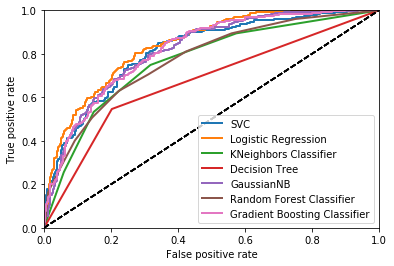

In [308]:
# plotting ROC curve
%matplotlib inline
def plot_roc_curve(fpr,tpr,name):
    plt.plot(fpr,tpr,linewidth=2,label=name)
    plt.legend(loc='lower right')
    # x and corresponding y ex. [x1,x2] and [y1,y2]
    plt.plot([0,1],[0,1],'k--')
    # axis xmin,xmax,ymin,ymax
    plt.axis([0,1,0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

from sklearn.metrics import roc_curve

def ROCCurveModel(model,name,X_train,y_train):
    model.fit(X_train,y_train)
    if name in ['SVC','Logistic Regression']:
        y_pred_score = cross_val_predict(model,X_train,y_train,cv=3,method="decision_function")
        fpr,tpr,threshold = roc_curve(y_train, y_pred_score)
    else:
        y_pred = cross_val_predict(model,X_train,y_train,cv=3,method="predict_proba")
        fpr,tpr,threshold = roc_curve(y_train, y_pred[:,1])
    return fpr,tpr,threshold

def plot_all_models_ROC_curve(models,X_train,y_train):
    for name, model in models:
        model.fit(X_train,y_train)
        fpr,tpr,threshold = ROCCurveModel(model,name,X_train,y_train)
        plot_roc_curve(fpr,tpr,name)
        
plot_all_models_ROC_curve(models,X_train,y_train)

### Lets try feature selection with only Plasma and BMI

,Name,ROC AUC score CV,test_scores ROC auc
0,SVC,0.672941,0.612051
1,Logistic Regression,0.811645,0.752995
2,KNeighbors Classifier,0.754682,0.710007
3,Decision Tree,0.636495,0.602889
4,GaussianNB,0.813717,0.768147
5,Random Forest Classifier,0.762415,0.664553
6,Gradient Boosting Classifier,0.795068,0.706483


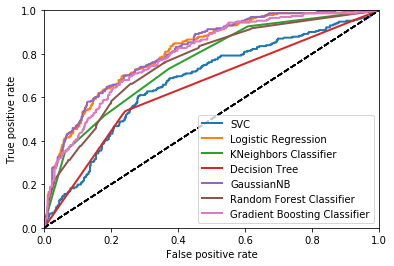

In [309]:
data = load_diabetes_data()
data = data[["Plasma","BMI","Target"]]
X_train, X_test, y_train, y_test = preprocess_data(data,0.1,["Plasma","BMI"])
plot_all_models_ROC_curve(models,X_train,y_train)
showAUCScore(models,X_train, X_test, y_train, y_test)

### These two parameters clearly reducing auc score

,Name,ROC AUC score CV,test_scores ROC auc
0,SVC,0.691285,0.633013
1,Logistic Regression,0.795677,0.693910
2,KNeighbors Classifier,0.712940,0.676282
3,Decision Tree,0.680597,0.671474
4,GaussianNB,0.794480,0.714744
5,Random Forest Classifier,0.691257,0.705128
6,Gradient Boosting Classifier,0.737798,0.661859


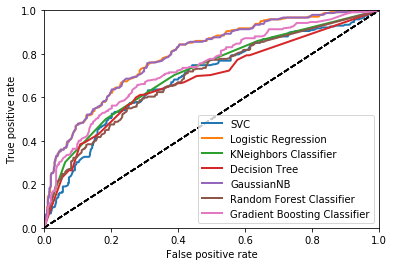

In [310]:
data = load_diabetes_data()
data = data[["Plasma","Target"]]
X_train, X_test, y_train, y_test = preprocess_data(data,0.1,["Plasma"])
plot_all_models_ROC_curve(models,X_train,y_train)
showAUCScore(models,X_train, X_test, y_train, y_test)

### It is even reducing score

### Lets try by using scaling

,Name,ROC AUC score CV,test_scores ROC auc
0,SVC,0.815196,0.685455
1,Logistic Regression,0.840601,0.718182
2,KNeighbors Classifier,0.765488,0.685455
3,Decision Tree,0.650650,0.780909
4,GaussianNB,0.818336,0.698182
5,Random Forest Classifier,0.798176,0.715455
6,Gradient Boosting Classifier,0.817963,0.793636


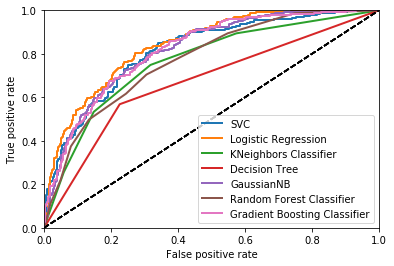

In [311]:
data = load_diabetes_data()
data_preprocess_pipeline = Pipeline([("purge_zero",RemoveInvalidZeroValuesAttributes(["Plasma","BMI","BP"])),])
data = data_preprocess_pipeline.fit_transform(data)
data = pd.DataFrame.from_records(data)
X, y = Separate_X_y_data(data)
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = produce_train_test_data(X,y,0.1)
plot_all_models_ROC_curve(models,X_train,y_train)
showAUCScore(models,X_train, X_test, y_train, y_test)

### Logistic jumps to the highest

### Now lets try two selected features again

In [315]:
def data_selected_feature_and_scaling(features,scaling = True,ratio=0.1):
    data = load_diabetes_data()
    data_preprocess_pipeline = Pipeline([("purge_zero",RemoveInvalidZeroValuesAttributes(features)),])
    data = data_preprocess_pipeline.fit_transform(data)
    data = pd.DataFrame.from_records(data)
    data = data[features]
    X, y = Separate_X_y_data(data)
    scaler = StandardScaler()
    X=scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = produce_train_test_data(X,y,ratio)
    return X_train, X_test, y_train, y_test
    

In [316]:
X_train, X_test, y_train, y_test = data_selected_feature_and_scaling(["Plasma","BMI","AGE","Target"])

In [317]:
showAUCScore(models,X_train, X_test, y_train, y_test)

ValueError: The number of classes has to be greater than one; got 1 class